In [1]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(256,256),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(256,256),
    batch_size=32
)

Found 1005 files belonging to 2 classes.
Using 804 files for training.
Found 1005 files belonging to 2 classes.
Using 201 files for validation.


In [8]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
val_ds=val_ds.map(process)

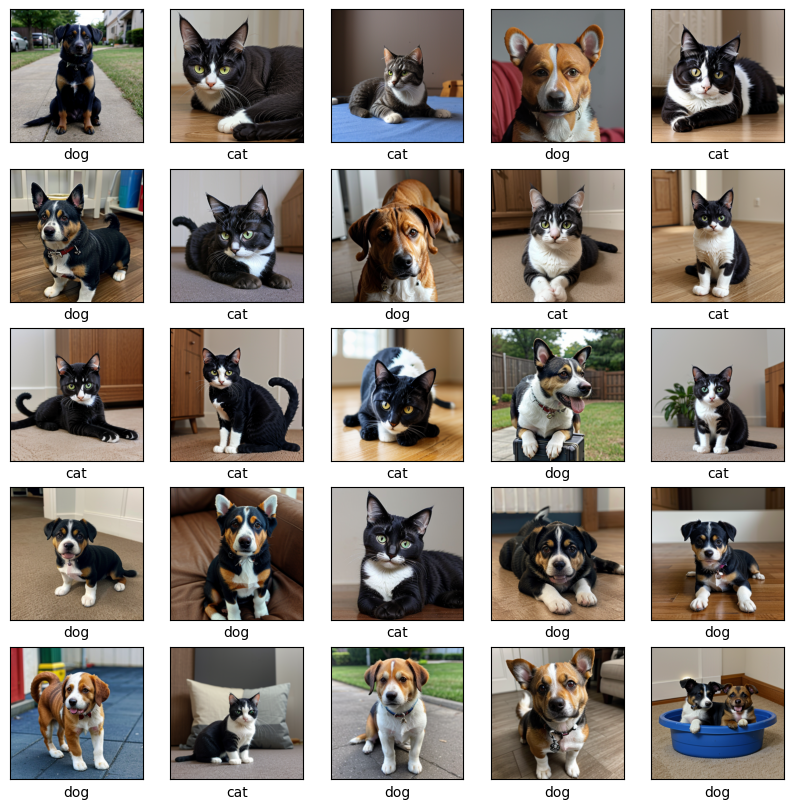

In [9]:
import matplotlib.pyplot as plt
for image,label in train_ds.take(1):
    class_name=["cat","dog"]
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image[i])
        plt.xlabel(class_name[label[i]])

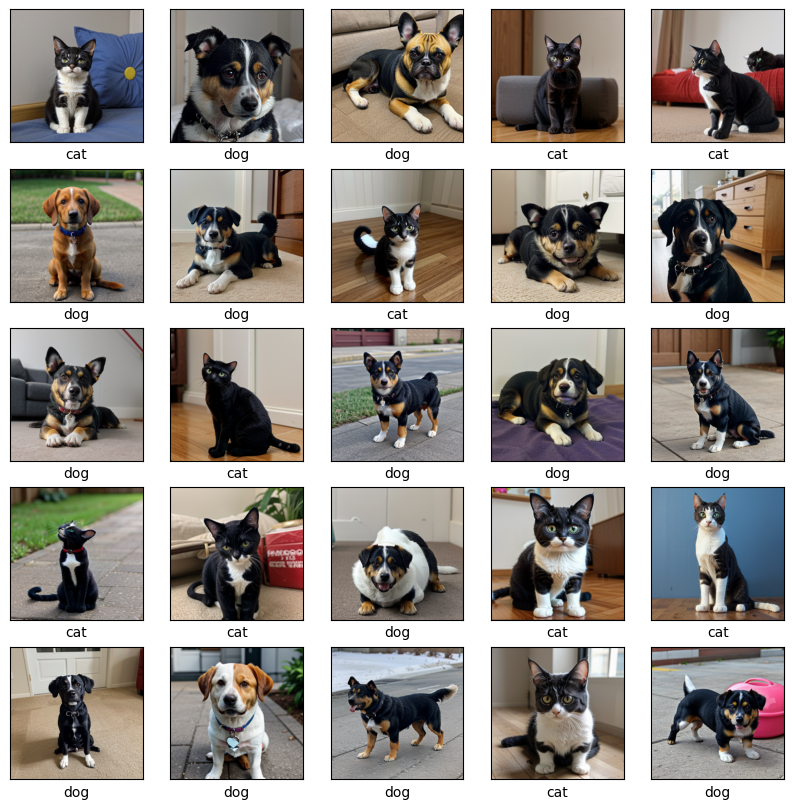

In [10]:
for image,label in val_ds.take(1):
    class_name=["cat","dog"]
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image[i])
        plt.xlabel(class_name[label[i]])

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,BatchNormalization,Dropout,Flatten

In [108]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [109]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [111]:
history=model.fit(train_ds,epochs=7,validation_data=val_ds)

Epoch 1/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6107 - loss: 0.7445 - val_accuracy: 0.7164 - val_loss: 0.5089
Epoch 2/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8396 - loss: 0.3656 - val_accuracy: 0.8607 - val_loss: 0.2938
Epoch 3/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9366 - loss: 0.2038 - val_accuracy: 0.9055 - val_loss: 0.1926
Epoch 4/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9527 - loss: 0.1183 - val_accuracy: 0.9303 - val_loss: 0.1945
Epoch 5/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9838 - loss: 0.0449 - val_accuracy: 0.9104 - val_loss: 0.2256
Epoch 6/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9913 - loss: 0.0243 - val_accuracy: 0.9403 - val_loss: 0.1875
Epoch 7/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9938 - loss: 0.0212 - val_accuracy: 0.9204 - val_loss: 0.2787


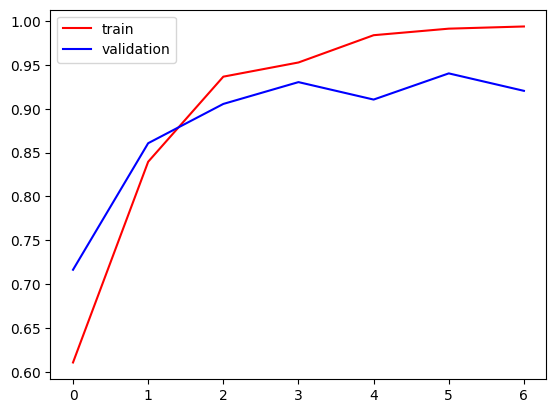

In [124]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

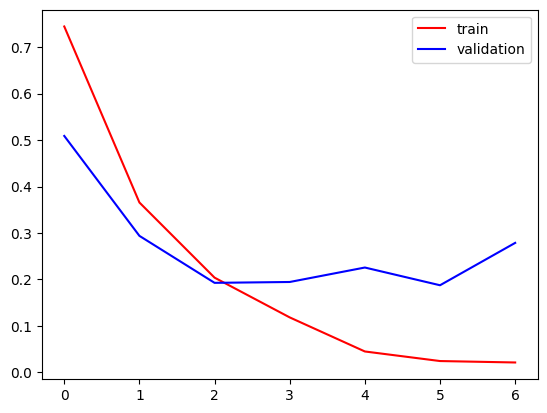

In [125]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [117]:
from tensorflow import keras
from keras.preprocessing import image

In [118]:
img=image.load_img("360_F_426072980_kPzQf1vNgmA1Cf669nLcIq19EZ0K9p5j.webp",target_size=(256,256))

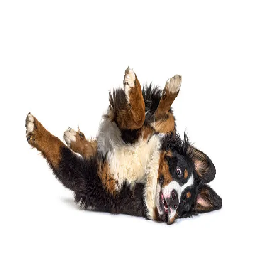

In [119]:
img

In [120]:
img=image.img_to_array(img)

In [121]:
img.shape

(256, 256, 3)

In [122]:
img=img.reshape(1,256,256,3)

In [123]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


array([[1.]], dtype=float32)